Triangulated Point: (1.5200351247926496, 1.299913155566013)


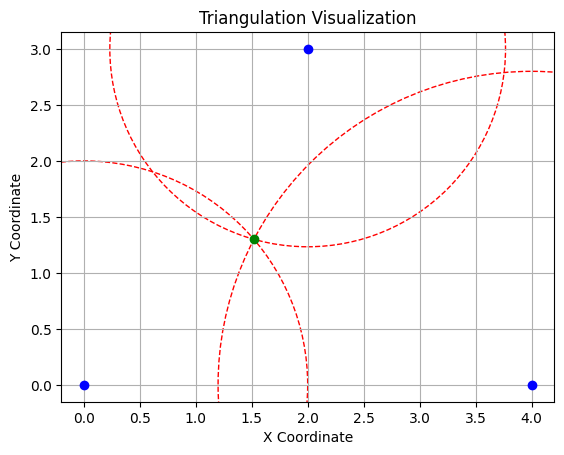

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def find_intersection(x1, y1, r1, x2, y2, r2):
    """Find the intersection points of two circles."""
    dx, dy = x2 - x1, y2 - y1
    d = np.sqrt(dx**2 + dy**2)
    if d > r1 + r2:
        return None  
    if d < abs(r1 - r2):
        return None  
    if d == 0 and r1 == r2:
        return None  

    a = (r1**2 - r2**2 + d**2) / (2 * d)
    h = np.sqrt(r1**2 - a**2)
    xm = x1 + a * dx / d
    ym = y1 + a * dy / d
    xs1 = xm + h * dy / d
    xs2 = xm - h * dy / d
    ys1 = ym - h * dx / d
    ys2 = ym + h * dx / d

    return (xs1, ys1), (xs2, ys2)

def triangulate(points, distances):
    """Improved triangulation considering closest intersection points."""
    all_intersections = []
    for i in range(len(points)):
        for j in range(i+1, len(points)):
            inters = find_intersection(points[i][0], points[i][1], distances[i],
                                       points[j][0], points[j][1], distances[j])
            if inters:
                all_intersections.append(inters)

    if not all_intersections:
        return None  


    min_dist = float('inf')
    best_pair = None
    for i, pair1 in enumerate(all_intersections):
        for j, pair2 in enumerate(all_intersections):
            if i != j:
                for p1 in pair1:
                    for p2 in pair2:
                        dist = np.hypot(p1[0] - p2[0], p1[1] - p2[1])
                        if dist < min_dist:
                            min_dist = dist
                            best_pair = (p1, p2)

    if best_pair:
     
        x_avg = (best_pair[0][0] + best_pair[1][0]) / 2
        y_avg = (best_pair[0][1] + best_pair[1][1]) / 2
        return x_avg, y_avg

    return None


def plot_circles_and_intersection(points, distances, intersection):
    fig, ax = plt.subplots()
    for (x, y), r in zip(points, distances):
        circle = plt.Circle((x, y), r, fill=False, edgecolor='r', linestyle='--')
        ax.add_artist(circle)
        ax.plot(x, y, 'bo')  # Blue dot for center of circle

    if intersection:
        ax.plot(intersection[0], intersection[1], 'go')  # Green dot for intersection

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Triangulation Visualization')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True)
    plt.show()

points = [(0, 0), (4, 0), (2, 3)]  
distances = [2, 2.8, 1.76646539734]  

triangulated_point = triangulate(points, distances)
print("Triangulated Point:", triangulated_point)




plot_circles_and_intersection(points, distances, triangulated_point)
